In [2]:
import numpy as np

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customer = pd.read_csv('C:/Users/Lenovo/Downloads/Python Foundation Case Study 1 - Retail Case Study/Customer.csv')
customer

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0
...,...,...,...,...
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0


In [4]:
transactions = pd.read_csv('C:/Users/Lenovo/Downloads/Python Foundation Case Study 1 - Retail Case Study/Transactions.csv')
transactions

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


In [5]:
category = pd.read_csv('C:/Users/Lenovo/Downloads/Python Foundation Case Study 1 - Retail Case Study/prod_cat_info.csv')
category.head(2)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women


In [6]:
pre_final = pd.merge(customer,transactions,how ='inner',left_on ='customer_Id',right_on = 'cust_id')
pre_final.head(1)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop


In [7]:
category.rename(columns ={'prod_sub_cat_code':'prod_subcat_code'},inplace = True)
category.head(1)

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat
0,1,Clothing,4,Mens


In [8]:
customer_final = pd.merge(pre_final,category,how = 'inner',left_on = ['prod_subcat_code', 'prod_cat_code'],right_on =['prod_subcat_code', 'prod_cat_code'])

In [37]:
##Ques 1a
customer_final.dtypes

customer_Id           int64
DOB                  object
Gender               object
city_code           float64
transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
dtype: object

In [9]:
customer_final["DOB"]=customer_final["DOB"].apply(lambda x:pd.to_datetime(x))
customer_final["tran_date"]=customer_final["tran_date"].apply(lambda x:pd.to_datetime(x))
customer_final.info()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2044\188806236.py:1: UserWarning: Parsing '16-01-1970' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  customer_final["DOB"]=customer_final["DOB"].apply(lambda x:pd.to_datetime(x))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2044\188806236.py:1: UserWarning: Parsing '18-01-1970' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  customer_final["DOB"]=customer_final["DOB"].apply(lambda x:pd.to_datetime(x))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2044\188806236.py:1: UserWarning: Parsing '22-01-1970' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  customer_final["DOB"]=customer_final["DOB"].apply(lambda x:pd.to_datetime(x))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2044\188806236.py:1: UserWarning: Parsing '29-01-1970' in DD/MM/YYYY format. Provide format or specify infer_datetime_

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_Id       23053 non-null  int64         
 1   DOB               23053 non-null  datetime64[ns]
 2   Gender            23044 non-null  object        
 3   city_code         23045 non-null  float64       
 4   transaction_id    23053 non-null  int64         
 5   cust_id           23053 non-null  int64         
 6   tran_date         23053 non-null  datetime64[ns]
 7   prod_subcat_code  23053 non-null  int64         
 8   prod_cat_code     23053 non-null  int64         
 9   Qty               23053 non-null  int64         
 10  Rate              23053 non-null  int64         
 11  Tax               23053 non-null  float64       
 12  total_amt         23053 non-null  float64       
 13  Store_type        23053 non-null  object        
 14  prod_cat          2305

In [71]:
customer_final.isna().sum()

customer_Id         0
DOB                 0
Gender              9
city_code           8
transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
dtype: int64

In [10]:
customer_final.duplicated().sum()
customer_final.drop_duplicates(inplace = True)
customer_final.duplicated().sum()

0

In [63]:
##Ques 2b
customer_final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,16-01-1970,M,4.0,73109425404,275152,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,18-01-1970,F,4.0,64777271023,275034,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction
3,270829,22-01-1970,F,8.0,87174343938,270829,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,267657,29-01-1970,F,7.0,76242744953,267657,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction
5,274630,01-02-1970,M,4.0,78357345891,274630,11/4/2012,7,5,1,646,67.830,713.830,TeleShop,Books,Fiction
6,273541,01-02-1970,M,4.0,23916816961,273541,9/2/2013,7,5,4,410,172.200,1812.200,e-Shop,Books,Fiction
7,269008,13-02-1970,F,6.0,35560569829,269008,9/3/2013,7,5,1,1441,151.305,1592.305,e-Shop,Books,Fiction
8,269008,13-02-1970,F,6.0,94033312891,269008,26-04-2012,7,5,5,746,391.650,4121.650,MBR,Books,Fiction
9,267199,14-02-1970,NaN,2.0,56749259881,267199,11/1/2012,7,5,4,1049,440.580,4636.580,MBR,Books,Fiction


In [65]:
customer_final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
23043,268914,15-11-1992,F,3.0,1407823655,268914,10/6/2011,10,5,1,1252,131.460,1383.460,MBR,Books,Non-Fiction
23044,269519,17-11-1992,M,9.0,29719500605,269519,24-12-2013,10,5,4,1036,435.120,4579.120,TeleShop,Books,Non-Fiction
23045,273524,25-11-1992,F,1.0,25762805863,273524,19-11-2012,10,5,1,1401,147.105,1548.105,Flagship store,Books,Non-Fiction
23046,272141,02-12-1992,F,10.0,71337087467,272141,22-07-2012,10,5,-3,-1422,447.930,-4713.930,e-Shop,Books,Non-Fiction
23047,272141,02-12-1992,F,10.0,71337087467,272141,16-07-2012,10,5,3,1422,447.930,4713.930,e-Shop,Books,Non-Fiction
23048,267812,04-12-1992,F,1.0,63540378797,267812,10/10/2012,10,5,3,224,70.560,742.560,TeleShop,Books,Non-Fiction
23049,274618,09-12-1992,F,7.0,71793203305,274618,17-08-2013,10,5,4,691,290.220,3054.220,Flagship store,Books,Non-Fiction
23050,268097,15-12-1992,F,7.0,91217108818,268097,1/2/2012,10,5,2,411,86.310,908.310,e-Shop,Books,Non-Fiction
23051,268097,15-12-1992,F,7.0,90114483354,268097,31-01-2011,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,Non-Fiction
23052,268097,15-12-1992,F,7.0,90114483354,268097,26-01-2011,10,5,4,1408,591.360,6223.360,e-Shop,Books,Non-Fiction


In [82]:
## Ques
five_number_summary =customer_final.describe()
five_number_summary.drop(['count','mean','std'],axis = 0,inplace = True)

In [89]:
five_number_summary



min   -8270.925
25%     762.450
50%    1756.950
75%    3570.255
max    8287.500
Name: total_amt, dtype: float64

In [92]:
customer_final.loc[:,customer_final.dtypes == 'object'].describe()

,Gender,Store_type,prod_cat,prod_subcat
count,23031,23040,23040,23040
unique,2,4,6,18
top,M,e-Shop,Books,Women
freq,11804,9304,6066,3046


In [109]:
customer_final.dtypes

customer_Id                  int64
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
dtype: object

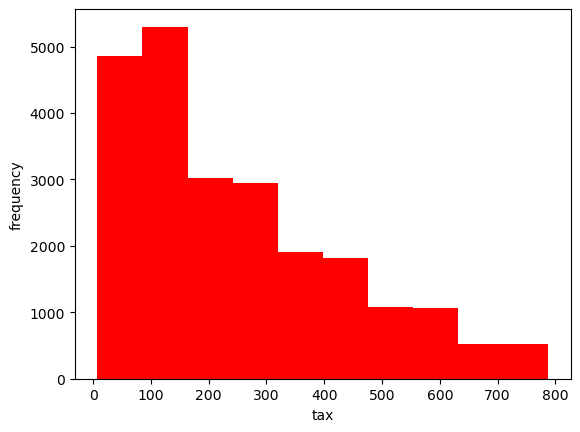

In [110]:
import matplotlib.pyplot as plt
Tax = customer_final['Tax']
plt.hist(Tax,color=['red'])
plt.xlabel('tax')
plt.ylabel('frequency')
plt.show()

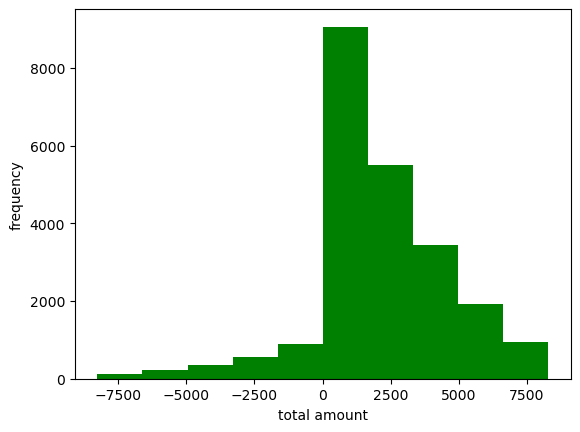

In [112]:
Total_Amount=customer_final["total_amt"]
plt.hist(Total_Amount,color="green")
plt.xlabel("total amount")
plt.ylabel("frequency")
plt.show()

<AxesSubplot:>

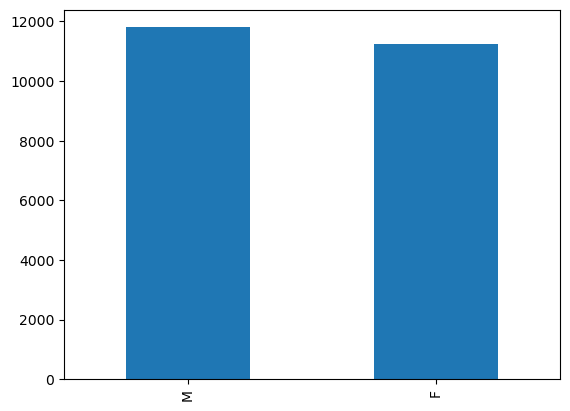

In [100]:
customer_final['Gender'].value_counts().plot(kind = 'bar')

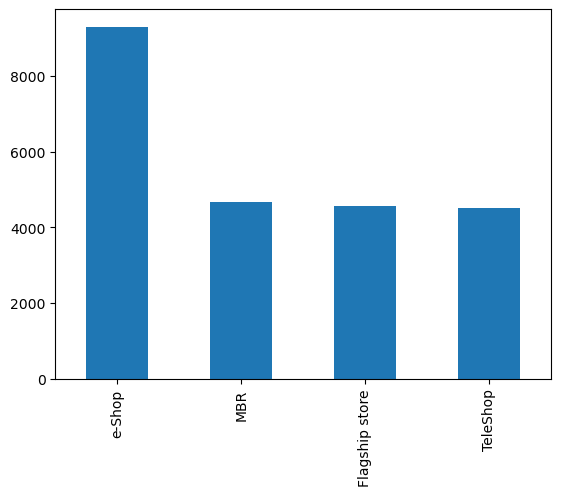

In [105]:
Store_type = customer_final['Store_type'].value_counts().plot(kind='bar')

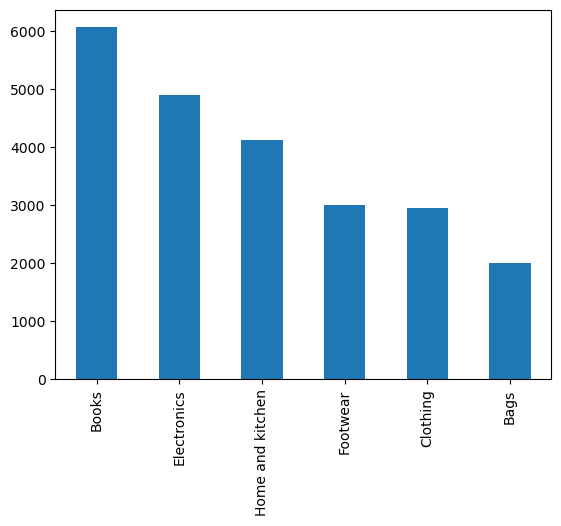

In [106]:
Store_type = customer_final['prod_cat'].value_counts().plot(kind='bar')

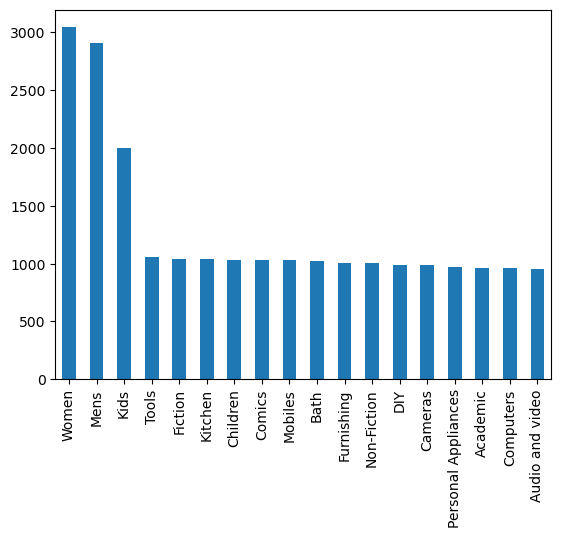

In [107]:
Store_type = customer_final['prod_subcat'].value_counts().plot(kind='bar')

In [114]:
customer_final.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-02-01,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,1970-01-18,F,4.0,64777271023,275034,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction
3,270829,1970-01-22,F,8.0,87174343938,270829,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,267657,1970-01-29,F,7.0,76242744953,267657,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction


In [129]:
customer_final.sort_values(by="tran_date",ascending=False)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
9068,270810,1972-01-03,F,1.0,55245382907,270810,2014-12-02,4,3,2,979,205.590,2163.590,TeleShop,Electronics,Mobiles
20846,273552,1987-06-22,F,10.0,12323853707,273552,2014-12-02,12,6,4,510,214.200,2254.200,TeleShop,Home and kitchen,Tools
7730,267466,1987-06-08,F,7.0,97409887219,267466,2014-12-02,4,4,1,78,8.190,86.190,e-Shop,Bags,Women
14635,274652,1985-08-07,M,8.0,60596009595,274652,2014-12-02,12,5,4,183,76.860,808.860,MBR,Books,Academic
16048,266794,1971-02-28,F,9.0,15403541663,266794,2014-12-02,3,2,2,322,67.620,711.620,e-Shop,Footwear,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13553,271613,1981-12-09,F,1.0,24003493504,271613,2011-01-02,8,3,5,1238,649.950,6839.950,e-Shop,Electronics,Personal Appliances
14962,269958,1992-04-07,M,3.0,83849473598,269958,2011-01-02,12,5,3,403,126.945,1335.945,e-Shop,Books,Academic
19163,273949,1974-01-25,M,4.0,45127479223,273949,2011-01-02,3,5,1,366,38.430,404.430,MBR,Books,Comics
1082,275166,1970-05-11,M,10.0,31795262740,275166,2011-01-02,1,4,4,531,223.020,2347.020,e-Shop,Bags,Mens


In [135]:
min_date = customer_final['tran_date'].min()

In [136]:
max_date = customer_final['tran_date'].max()

In [137]:
print("Time period of the available transaction data is from " + pd.Timestamp.strftime(min_date,format="%d-%m-%y") + " to " 
     + pd.Timestamp.strftime(max_date,format="%d-%m-%y"))

Time period of the available transaction data is from 02-01-11 to 02-12-14


In [127]:
##Ques 4b
negative_transaction = customer_final[customer_final['total_amt'] < 0]
negative_transaction

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
10,272883,1970-02-19,M,5.0,35308880657,272883,2013-01-12,7,5,-4,-1161,487.620,-5131.620,TeleShop,Books,Fiction
15,267379,1970-03-21,F,2.0,18331140958,267379,2014-04-01,7,5,-1,-842,88.410,-930.410,TeleShop,Books,Fiction
22,274849,1970-09-06,M,4.0,91064381796,274849,2013-11-12,7,5,-3,-735,231.525,-2436.525,TeleShop,Books,Fiction
37,269235,1970-10-22,F,4.0,85861933577,269235,2012-10-10,7,5,-1,-234,24.570,-258.570,e-Shop,Books,Fiction
38,269235,1970-10-22,F,4.0,85861933577,269235,2012-06-10,7,5,-1,-234,24.570,-258.570,e-Shop,Books,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23023,270658,1992-06-29,M,10.0,72498423772,270658,2013-07-14,10,5,-2,-1398,293.580,-3089.580,e-Shop,Books,Non-Fiction
23026,269958,1992-04-07,M,3.0,76680456784,269958,2013-03-17,10,5,-5,-1463,768.075,-8083.075,e-Shop,Books,Non-Fiction
23039,267167,1992-10-26,M,6.0,69861996576,267167,2011-08-23,10,5,-2,-862,181.020,-1905.020,MBR,Books,Non-Fiction
23046,272141,1992-02-12,F,10.0,71337087467,272141,2012-07-22,10,5,-3,-1422,447.930,-4713.930,e-Shop,Books,Non-Fiction


In [179]:
Q5 = customer_final.groupby(['prod_cat','Gender'])[['Qty']].size().reset_index()
Q5.rename(columns = {0:'Count'},inplace = True)
Q5



,prod_cat,Gender,Count
0,Bags,F,993
1,Bags,M,1004
2,Books,F,2946
3,Books,M,3116
4,Clothing,F,1439
5,Clothing,M,1518
6,Electronics,F,2328
7,Electronics,M,2567
8,Footwear,F,1528
9,Footwear,M,1467


In [194]:
max_customer = customer_final['city_code'].value_counts()



In [203]:
max_customer = max_customer[:4]
max_customer

4.0    2422
Name: city_code, dtype: int64

In [222]:
c1 = customer_final['city_code'].value_counts()


In [227]:
c2 = customer_final['city_code'].count()

In [228]:
c3 = (c1/c2)* 100

In [225]:
c3


4.0     10.515804
3.0     10.463703
5.0     10.233588
7.0     10.229246
10.0    10.129385
8.0     10.107676
2.0      9.847169
1.0      9.790726
9.0      9.447725
6.0      9.234977
Name: city_code, dtype: float64

In [266]:
##7. Which store type sells the maximum products by value and by quantity
store_type_max = customer_final.sort_values(['Rate','Qty'],ascending=False).head(1)
store_type_max = store_type_max['Store_type']

In [281]:
##8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?
customer_amount1=customer_final[(customer_final['Store_type']== 'Flagship store') &
                                ((customer_final['prod_cat']=='Electronics') |
                                (customer_final['prod_cat']=='Clothing'))]['total_amt'].sum()
customer_amount1


3409559.27

In [291]:
## 9. What was the total amount earned from "Male" customers under the "Electronics" category?
customer_final[(customer_final['Gender'] == 'M') &
               (customer_final['prod_cat'] =='Electronics')][['total_amt']].sum()

total_amt    5711351.62
dtype: float64

In [300]:
## 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?
positive_amt = customer_final[customer_final['total_amt'] > 0]

In [302]:
unique_trans = positive_amt.groupby(['customer_Id','prod_cat','prod_subcat'])['transaction_id'].count().reset_index()

In [303]:
unique_transaction = unique_trans.groupby('customer_Id')[['transaction_id']].count().sort_values(by='transaction_id',ascending=False)
unique_transaction

,transaction_id
customer_Id,
270908,10
272286,10
274854,10
273014,10
268076,9
...,...
270259,1
270265,1
267996,1


In [306]:
unique_transaction[unique_transaction["transaction_id"]>10]

,transaction_id
customer_Id,


In [17]:
## 11. For all customers aged between 25 - 35, find out: a. What was the total amount spent for “Electronics” and “Books” product categories?b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?
customer_final['current_year']=pd.to_datetime('today').year
customer_final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB_Year,current_year
0,268408,1970-02-01,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction,1970,2023
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction,1970,2023
2,275034,1970-01-18,F,4.0,64777271023,275034,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction,1970,2023
3,270829,1970-01-22,F,8.0,87174343938,270829,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction,1970,2023
4,267657,1970-01-29,F,7.0,76242744953,267657,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction,1970,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,267812,1992-04-12,F,1.0,63540378797,267812,2012-10-10,10,5,3,224,70.560,742.560,TeleShop,Books,Non-Fiction,1992,2023
23049,274618,1992-09-12,F,7.0,71793203305,274618,2013-08-17,10,5,4,691,290.220,3054.220,Flagship store,Books,Non-Fiction,1992,2023
23050,268097,1992-12-15,F,7.0,91217108818,268097,2012-01-02,10,5,2,411,86.310,908.310,e-Shop,Books,Non-Fiction,1992,2023
23051,268097,1992-12-15,F,7.0,90114483354,268097,2011-01-31,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,Non-Fiction,1992,2023


In [18]:
customer_final['DOB_Year'] = customer_final['DOB'].dt.year

In [19]:
customer_final['Age'] = customer_final['current_year'] - customer_final['DOB_Year']
customer_final


,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB_Year,current_year,Age
0,268408,1970-02-01,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction,1970,2023,53
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction,1970,2023,53
2,275034,1970-01-18,F,4.0,64777271023,275034,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction,1970,2023,53
3,270829,1970-01-22,F,8.0,87174343938,270829,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction,1970,2023,53
4,267657,1970-01-29,F,7.0,76242744953,267657,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction,1970,2023,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,267812,1992-04-12,F,1.0,63540378797,267812,2012-10-10,10,5,3,224,70.560,742.560,TeleShop,Books,Non-Fiction,1992,2023,31
23049,274618,1992-09-12,F,7.0,71793203305,274618,2013-08-17,10,5,4,691,290.220,3054.220,Flagship store,Books,Non-Fiction,1992,2023,31
23050,268097,1992-12-15,F,7.0,91217108818,268097,2012-01-02,10,5,2,411,86.310,908.310,e-Shop,Books,Non-Fiction,1992,2023,31
23051,268097,1992-12-15,F,7.0,90114483354,268097,2011-01-31,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,Non-Fiction,1992,2023,31


In [23]:
total_amt = customer_final[((customer_final['prod_cat'] == 'Electronics') |
               (customer_final['prod_cat'] == 'Books')) &
               (customer_final['Age'] >= 25) & (customer_final['Age'] <= 35)]

In [384]:
##11b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?
age_25_35_customer = customer_final[(customer_final['Age'] >= 25) & (customer_final['Age'] <= 35)]['total_amt'].sum()
age_25_35_customer

10559347.955

In [24]:
total_amt['Age'].unique()

array([35, 34, 33, 32, 31], dtype=int64)